In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

In [4]:
#Loading Datasets
epl_df=pd.read_csv('EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [5]:
#general stats
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [6]:
#checking for nulls
epl_df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
# adding 2 more relevant columns to dataframe
epl_df['mins_per_match']=(epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['goals_per_match']=(epl_df['Goals']/epl_df['Matches']).astype(float)



In [8]:
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,mins_per_match,goals_per_match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [9]:
#total goals in whole season
total_goals=epl_df['Goals'].sum()
print(total_goals)

#total penalty goals in whole season
total_penalty_goals=epl_df['Penalty_Goals'].sum()
print(total_penalty_goals)

#total penalty attempts
total_penalty_attempts=epl_df['Penalty_Attempted'].sum()
print(total_penalty_attempts)


986
102
125


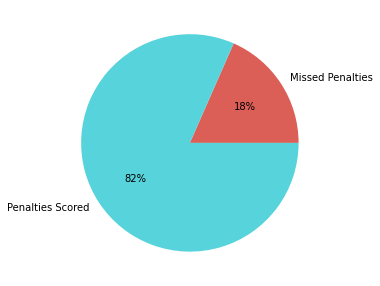

In [10]:
#pie chart for penalties scored vs missed
plot.figure(figsize=(5, 5))

missed_penalties=total_penalty_attempts-total_penalty_goals

data=[missed_penalties, total_penalty_goals]
labels=['Missed Penalties', 'Penalties Scored']
color=sb.color_palette("hls", 2)

plot.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plot.show()

In [11]:
#unique Positions
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [12]:
# forward players
epl_df[epl_df['Position']=='FW'].head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,mins_per_match,goals_per_match
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581


In [13]:
#number of nationalities 
np.size(epl_df['Nationality'].unique())

59

<AxesSubplot:xlabel='Nationality'>

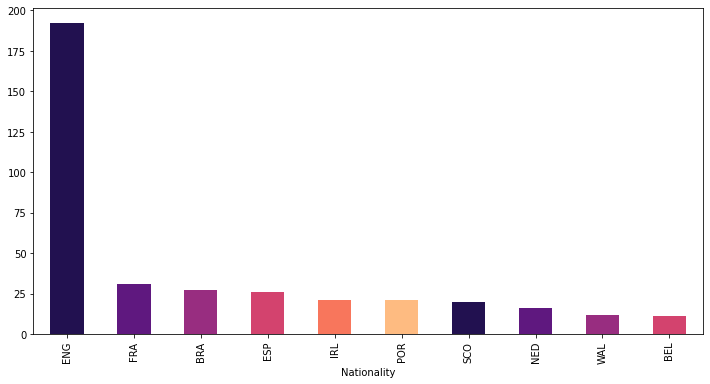

In [24]:
#most players frin which country
nationality=epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar', figsize=(12,6), color=sb.color_palette("magma"))

In [26]:
#number of players based on age group
under20=epl_df[epl_df['Age']<=20]
age20_25=epl_df[(epl_df['Age']>=20) & (epl_df['Age']<=25)]
age25_30=epl_df[(epl_df['Age']>=25) & (epl_df['Age']<=30)]
above30=epl_df[epl_df['Age']>30]

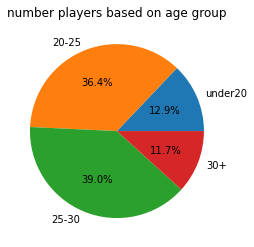

In [29]:
x=np.array([under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), above30['Name'].count()])
labels=["under20", "20-25", "25-30", "30+"]
plot.title("percentage players based on age group")
plot.pie(x, labels=labels, autopct='%.1f%%')
plot.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

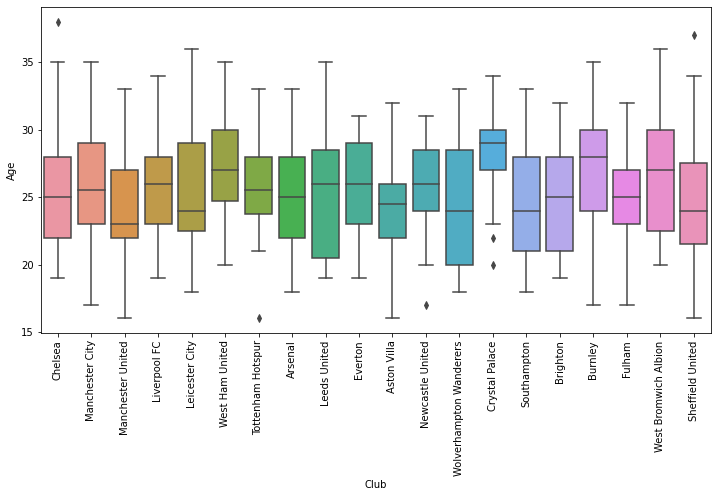

In [30]:
#average age of players in each club
plot.figure(figsize=(12,6))
sb.boxplot(x='Club', y='Age', data=epl_df)
plot.xticks(rotation=90)

In [33]:
#total assists from each club
assits_by_clubs=pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
assits_by_clubs.head()

,Club,Assists
0,Arsenal,38
1,Aston Villa,38
2,Brighton,24
3,Burnley,20
4,Chelsea,38


In [35]:
#top 5 assists
x=epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=5, columns='Assists')
x

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26


In [36]:
#most goals by players
x=epl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n=5, columns='Goals')
x

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38


In [37]:
# goals per match
x=epl_df[['Name', 'goals_per_match', 'Matches', 'Goals']].nlargest(n=5, columns='goals_per_match')
x

,Name,goals_per_match,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11


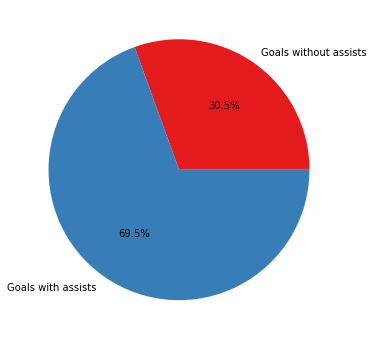

In [38]:
#pie chart of goals with and without assists
plot.figure(figsize=(12,6))
totalAssists=epl_df['Assists'].sum()
data=[total_goals-totalAssists, totalAssists]
labels=['Goals without assists', 'Goals with assists']
plot.pie(data,labels=labels, colors=sb.color_palette('Set1'), autopct="%.1f%%")
plot.show()

<AxesSubplot:title={'center':'Players with most yellow cards'}, xlabel='Name', ylabel='number of yellow cards'>

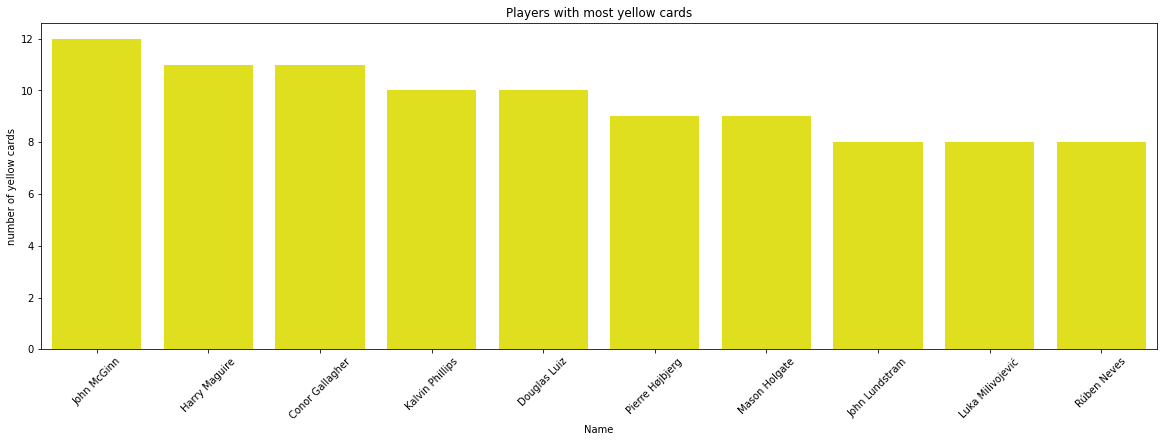

In [39]:
#top 10 players with most yellow cards
most_Yellows=epl_df.sort_values(by='Yellow_Cards', ascending=False)[:10]
plot.figure(figsize=(20,6))
plot.title('Players with most yellow cards')
c=sb.barplot(x=most_Yellows['Name'], y=most_Yellows['Yellow_Cards'],  label='Players', color='yellow')
plot.ylabel("number of yellow cards")
c.set_xticklabels(c.get_xticklabels(), rotation=45)
c